# Why do underdogs do better in the NHL than the NBA?

#### NBA in recent years has been criticized for being too predictable and lacking parity with the Warriors and Lebron James led teams featured in 4 straight finals. Whereas in the NHL, the Stanley Cup finals have had 9 different teams appear in the series in the last 5 years. When the last 31 years of these 2 major sports are compared, we see 11 different teams having won the NBA Championship compared to 17 different teams that have won the Stanley Cup.

#### In order to explore this alleged lack of parity and how certain aspects of the NHL can be leveraged to increase parity we have to introduce ways to compare the NHL with the NBA.

#### Comparison of major professional sports has always been a point of contention amongst sports fans with one fanbase accusing the other leagues of being easier to win the grand prize in.  A paper from [Lopez, Matthews, and Baumer](https://arxiv.org/pdf/1701.05976.pdf) discussed a model to assess strength of competition. 

#### Without building a complex model to assess the parity within the leagues, we will consider several factors: distribution in winning percentage between teams, playing time and impact of superstars, as well as the salary cap on a team's success.  

#### The majority of data referenced will be sourced from sports-reference (www.basketball-reference.com & www.hockey-reference.com)

# NBA Standings

#### The first step to determining winning percentage variance is to scrape the standings from www.basketball-reference.com for the last 31 years being mindful of the lockout shortened years of 2012 and 1999 which will be excluded from calculations.

In [3]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd 
import numpy as np

years = range(1989,2020,1)
teams = [u'Vancouver Grizzlies','Charlotte Bobcats','Seattle Supersonics','New Orleans Hornets',u'Toronto Raptors', u'Brooklyn Nets', u'Boston Celtics', u'New York Knicks', u'Philadelphia 76ers', u'Chicago Bulls', u'Cleveland Cavaliers', u'Milwaukee Bucks', u'Indiana Pacers', u'Detroit Pistons', u'Atlanta Hawks', u'Washington Wizards', u'Miami Heat', u'Orlando Magic', u'Charlotte Hornets', u'Portland Trail Blazers', u'Oklahoma City Thunder', u'Denver Nuggets', u'Utah Jazz', u'Minnesota Timberwolves', u'Golden State Warriors', u'Los Angeles Clippers', u'Phoenix Suns', u'Sacramento Kings', u'Los Angeles Lakers', u'Memphis Grizzlies', u'Houston Rockets', u'Dallas Mavericks', u'San Antonio Spurs', u'New Orleans Pelicans']
base_url = "https://www.basketball-reference.com/leagues/NBA_{}.html"
nba = pd.DataFrame()


for year in years:
    url = base_url.format(year)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    for team in teams:
        try:
            wins = soup.find(text = re.compile(team)).find_next("td").string
            losses = soup.find(text = re.compile(team)).find_next("td").find_next("td").string
            df = pd.DataFrame([team,wins,losses]).T
            df['Year'] = year
            nba = nba.append(df)
        except:
            pass
        
nba.columns = ['Team','Wins','Losses','Year']
nba = nba.reset_index()
nba.drop('index',axis = 1,inplace= True)
none_nba = nba[nba['Wins'].isnull()]
none_nba['Wins'] = none_nba['Losses']
none_nba['Wins'] = none_nba['Wins'].astype('int32')
none_nba['Losses'] = none_nba['Losses'].astype('int32')
none_nba['Losses'] = 82 - none_nba['Wins']


nba.drop(none_nba.index,inplace = True)
nba = nba.append(none_nba)
nba['Wins'] = nba['Wins'].astype('int32')
nba['Losses'] = nba['Losses'].astype('int32')
nba['win%'] = nba['Wins']/(nba['Wins'] + nba['Losses'])

#removing 1999 and 2012 seasons as they were lockout shortened to 50 and 66 games 
nba_fs = nba[(nba['Year'] != 2012) & (nba['Year'] != 1999)]



F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

# NHL Standings

#### Likewise for the NHL, we refer to www.hockey-reference.com for standings for the last 31 years skipping the 2005 season which saw no games played due to a lockout

In [47]:
years = np.arange(1989,2020,1)
base_url = 'https://www.hockey-reference.com/leagues/NHL_{}_standings.html'

nhl = pd.DataFrame()

for year in years:
    if year == 2005: #2005 saw no games played due to lockout 
        pass
    else:
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'standings'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        nhl = nhl.append(df[['Unnamed: 1','Overall','Year']])

nhl.columns = ['Team','Overall','Year']
nhl = nhl[nhl['Year'] != 2013] #removing 2013 season as it was lockout shortened
record_nhl = nhl.Overall.str.split("-",expand = True)
record_nhl.columns = ['Wins','RegL','OTL']

record_nhl['RegL'] = record_nhl['RegL'].astype('int32')
record_nhl['OTL'] = record_nhl['OTL'].astype('int32')
record_nhl['Wins'] = record_nhl['Wins'].astype('int32')
record_nhl['Losses'] = record_nhl['RegL'] + record_nhl['OTL']
record_nhl['win%'] = record_nhl['Wins']/(record_nhl['Wins'] + record_nhl['Losses'])
record_nhl = pd.concat([nhl[['Team','Year']],record_nhl],axis = 1)

In [28]:
print('NBA Average Winning %: ' + str(round(nba_fs['win%'].mean(),5)))
print('NHL Average Winning %: ' + str(round(record_nhl['win%'].mean(),5)))

print('NBA Winning % Standard Deviation: ' + str(round(nba_fs['win%'].std(),5)))
print('NHL Winning % Standard Deviation: ' + str(round(record_nhl['win%'].std(),5)))

NBA Average Winning %: 0.49913
NHL Average Winning %: 0.467
NBA Winning % Standard Deviation: 0.15323
NHL Winning % Standard Deviation: 0.1015


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 

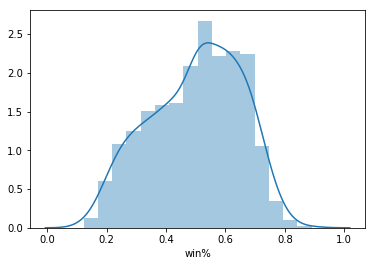

In [19]:
sns.distplot(nba_fs['win%'])

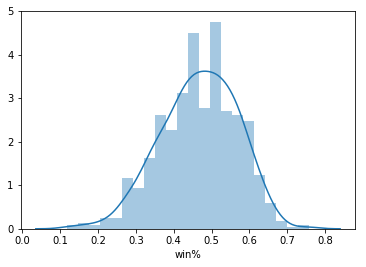

In [21]:
sns.distplot(record_nhl['win%'])

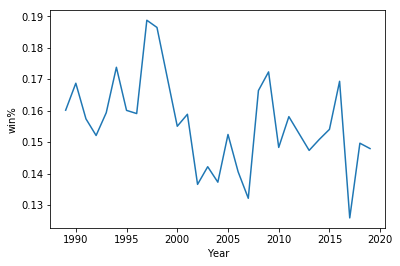

In [32]:
nba_wr = nba_fs.groupby('Year').agg('std')['win%'].reset_index()
sns.lineplot(x = 'Year', y = 'win%', data = nba_wr)

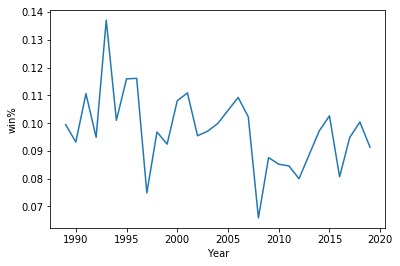

In [49]:
recordnhl = record_nhl.groupby('Year').agg('std')['win%'].reset_index()
sns.lineplot(x = 'Year', y = 'win%', data = recordnhl) 

#### Simple statistics show that approximately 64% of teams of NBA teams have between 35 and 65% winning % in the last 30 years while the NHL has around 64% of teams with between 37 and 57% winning % in the last 30 years. Also, the distribution of NHL winning percentages are more normally distributed than that of the NBA sees more teams with 55% win rate. It is also apparently that variance has also dropped gradually since 1989 for the NBA but its current level is still higher than that of the NHL.

#### This difference in variance and average winning percentage serves as a proxy for identifying a difference in parity between the 2 leagues. Next the investigation turns to the impact of star players and playing time in the finals.

### Scraping NHL and NBA Finals playing times from 1989-2019

In [51]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd 
import numpy as np

finals_url = {}
years = range(1989,2020,1)
i = 0


for year in years:
    url = 'https://www.basketball-reference.com/playoffs/NBA_{}.html'
    page = requests.get(url.format(year))
    soup = BeautifulSoup(page.content, 'html.parser')  
    for a in soup.find_all('a', href=True):
        if 'nba-finals-' in a['href']:
            i += 1
            finals_url[i] = a['href']
        else:
            pass
        
allurls = list(set(finals_url.values()))
allurls.sort()        

In [ ]:

nba_finals_stats = pd.DataFrame()
bballrefurl = 'https://www.basketball-reference.com{}'
# i = 1
year = 1989

# for url in allurls:

    
def finals_stats(url):
    year = allurls[allurls.index(url)][10:14]
    finalsurl = bballrefurl.format(url)
    df = pd.DataFrame()  
    for n in [-1,-2]:
        t1 = pd.read_html(finalsurl)[n]
        t1.columns = t1.columns.get_level_values(1) 
        t1['Team'] = 'Team' + str(n*-1)
        t1['Year'] = year
        df = df.append(t1[['Rk','Player','MP','Team','Year']])
#         print(df)
    return df

for url in allurls:
    nba_finals_stats = nba_finals_stats.append(finals_stats(url))
    

In [54]:
nhlfinals_url = {}
years = range(1989,2020,1)
i = 0


for year in years:
    url = 'https://www.hockey-reference.com/playoffs/NHL_{}.html'
    page = requests.get(url.format(year))
    soup = BeautifulSoup(page.content, 'html.parser')  
    for a in soup.find_all('a', href=True):
        if 'stanley' in a['href']:
            i += 1
            nhlfinals_url[i] = a['href']
        else:
            pass

allnhlurls = list(set(nhlfinals_url.values()))
allnhlurls.sort()

In [ ]:
nhlrefurl = 'https://www.hockey-reference.com{}'
nhl_finals_stats = pd.DataFrame()

def nhlfinals_stats(url):
    year = allnhlurls[allnhlurls.index(url)][10:14]
    finalsurl = nhlrefurl.format(url)
    df = pd.DataFrame()  
    for n in [-2,-4]:
        t1 = pd.read_html(finalsurl)[n]
        t1.columns = t1.columns.get_level_values(1) 
        t1['Team'] = 'Team' + str(int(n*-.5))
        t1['Year'] = year
        df = df.append(t1[['Rk','Player','Pos','ATOI','Team','Year']])
#         print(df)
    return df

for url in allnhlurls:
    nhl_finals_stats = nhl_finals_stats.append(nhlfinals_stats(url))


In [88]:
print("Starting 5 plays " + str(round(nba_finals_stats[nba_finals_stats['Rk'] < 6]['MP'].iloc[:,1].sum()/14880,3)*100) + "% of minutes during the finals")

Starting 5 plays 73.2% of minutes during the finals


In [90]:
forwards = nhl_finals_stats[(nhl_finals_stats['Pos'] != 'D') & (nhl_finals_stats['Pos'] != 'G')]
fw_min = forwards['ATOI'].str.split(":",expand = True)[0]
fw_min.fillna(0,inplace = True)
fw_min = fw_min.astype('int32')
print("Most minutes played by a forward during the Stanley Cup Finals: " + str(fw_min.max()))

Most minutes played by a forward during the Stanley Cup Finals: 24


#### Whilst time on ice data was not available until after 2000, we can see that since then the most minutes a forward has played during the Stanley Cup was 24 out of a possible 60 minutes. While in the NBA, the average starting 5 players 73.2% of all available minutes in a basketball game with instances of players playing all 48 minutes.

#### This is especially important when considering the difference in skill of star players in both the NHL and NBA

#### In order to do so, the season stats of players must be tabulated from both leagues

In [ ]:
# Get all values from 1989 to 2019, with interval of 1
import pandas as pd
import numpy as np

years = np.arange(1989,2020,1)
base_url = 'https://www.basketball-reference.com/leagues/NBA_{}_advanced.html'

adv = pd.DataFrame()

for year in years:
    if year == 2012 or year == 1999:
        pass:
    else:
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'advanced_stats'})
        df = pd.read_html(str(table))[0]
        df.drop(['Unnamed: 19','Unnamed: 24'],axis = 1,inplace = True)
        df['Year'] = year

        adv = adv.append(df)

In [ ]:
import pandas as pd
import numpy as np

years = np.arange(1989,2020,1)
base_url = 'https://www.hockey-reference.com/leagues/NHL_{}_skaters.html'

nhl = pd.DataFrame()

for year in years:
    if year == 2005:
        pass
    else:
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'stats'})
        df = pd.read_html(str(table))[0]
        df.columns = df.columns.get_level_values(1)
        df['Year'] = year

        nhl = nhl.append(df[nhlcols])

In [96]:
def q1(x):
    return x.quantile(.975)
def avg(x):
    return x.mean()
f = {'WS': ['median', 'std', q1,avg]}

ws = adv.groupby('Year').agg(f)['WS'].reset_index()
ws['starvsavg'] = ws['q1']/ws['avg']


In [99]:
nhl_f = {'PS': ['median', 'std', q1,avg]}
ps = nhl.groupby('Year').agg(nhl_f)['PS'].reset_index()
ps['starvsavg'] = ws['q1']/ps['avg']

#### Win Shares were a concept originally created in baseball to attribute wins to a players performance. That same concept has been applied to both NBA and NHL in the form of Win Shares and Point Shares respectively. They are both are the result of summing Offensive Win/Point Shares and Defensive Win/Point Shares. When comparing this metric of the stars of these leagues (assumed to be those in 97.5th percentile or higher) they are fairly similar at 4.3x league average for NBA and 4.76x league average for the NHL.

#### This shows that stars in both leagues have fairly equal prowess over the average player in the league but because NBA stars play more minutes, they are able to influence the game more and have more impact on the outcome of the game.  

In [109]:
print("Star Win Share Magnitude vs League Average:" + str(round(ws['starvsavg'].mean(),2)))
print("Star Point Share Magnitude vs League Average:" + str(round(ps['starvsavg'].mean(),2)))


Star Win Share Magnitude vs League Average:4.3
Star Point Share Magnitude vs League Average:4.76


#### Finally, the salary cap structure is different in the 2 leagues. A salary cap is a league imposed maximum total for an individual team's salary. The NHL implements a [hard cap](https://en.wikipedia.org/wiki/Salary_cap#National_Hockey_League) while the NBA has a [soft cap](https://en.wikipedia.org/wiki/Salary_cap#National_Basketball_Association_(soft_cap_+_luxury_tax)).   

#### A hard cap is a maximum which cannot be exceeded or the team must forfeit games until they become cap compliant. On the other hand, a soft cap is a maximum can be exceeded but a team must pay a 'tax' sanctioned for the amount for which the team has exceeded the cap.

In [114]:
nbachamps = pd.read_csv('NBA Champs.csv')
nhlchamps = pd.read_csv('NHL Champs.csv')

print("NBA Champs Last 30 Years")    
print(nbachamps['Winner'].value_counts())
print(str(len(nbachamps['Winner'].value_counts())) + " Different NBA Champions last 31 Years")
print(" ")
print(" ")
print("NHL Champs Last 30 Years")    
print(nhlchamps['Winner'].value_counts())
print(str(len(nhlchamps['Winner'].value_counts())) + " Different Stanley Cup winners last 31 Years")

NBA Champs Last 30 Years
Bulls       6
Lakers      5
Spurs       5
Heat        3
Warriors    3
Rockets     2
Pistons     2
Raptors     1
Celtics     1
Cavs        1
Mavs        1
Name: Winner, dtype: int64
11 Different NBA Champions last 31 Years
 
 
NHL Champs Last 30 Years
Pittsburgh Penguins    5
Detroit Red            4
Chicago Blackhawks     3
New Jersey             3
Colorado Avalanche     2
Los Angeles            2
Washington Capitals    1
New York               1
Boston Bruins          1
Calgary Flames         1
Dallas Stars           1
Carolina Hurricanes    1
Montreal Canadiens     1
Tampa Bay              1
Edmonton Oilers        1
Anaheim Ducks          1
St. Louis              1
Name: Winner, dtype: int64
17 Different Stanley Cup winners last 31 Years


#### On the surface there appears to be greater parity in the NHL compared to the NBA since 1989 where Bulls won 6 championships in the 90s and the Lakers 5 in 00s. However when a comparison is made after the NHL 2005 lockout where parity was increased with the introduction of the hard cap a different story is told..

In [121]:
print("NBA Champs Last 30 Years")   
print(nbachamps[nbachamps['Year'] > 2005]['Winner'].value_counts())
print(" ")
print("NHL Champs Last 30 Years")   
print(nhlchamps[nhlchamps['Year'] > 2005]['Winner'].value_counts())

NBA Champs Last 30 Years
Heat        3
Warriors    3
Lakers      2
Spurs       2
Raptors     1
Celtics     1
Cavs        1
Mavs        1
Name: Winner, dtype: int64
 
NHL Champs Last 30 Years
Chicago Blackhawks     3
Pittsburgh Penguins    3
Los Angeles            2
Anaheim Ducks          1
Carolina Hurricanes    1
Boston Bruins          1
Detroit Red            1
Washington Capitals    1
St. Louis              1
Name: Winner, dtype: int64


#### Since the NHL 2005 lockout, there have been 8 different NBA Champions and 9 different Stanley Cup winners. The different salary cap structures have improved parity over the years however one large advantage of the soft cap is the ability to go over the cap to re-sign existing players providing the organization is willing to pay the luxury and repeater taxes (luxury tax with increased rates for teams that exceed the cap in consecutive years).

#### Since, star players have such impact on the outcome of a basketball due to the amount of minutes they can be on the court, the ability to amass and retain multiple superstars provides a great advantage for teams who are financially capable of doing so creating a dynasty. A possible resolution to this problem would be to implement a hard cap in order to level the playing field as not all teams are financially capable to pay \\$145 Million in annual player salary with an additional \\$50 million in luxury tax which was the cost of fielding the 2018-2019 Warriors.

In [1]:

# talk about repeats pre and post NHL hard cap which was introduced in 2006 after 2005 lockout
# hard cap vs soft cap allowing continued success which is a major difference in the collective bargaining agreements 
# of the 2 leagues 


